In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(    num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 3s 1us/step


In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index. items()]) 
decoded_newswire =' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 1s 3us/step


In [4]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
           results[i, sequence] = 1. 
    return results
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

In [6]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)  
one_hot_test_labels = to_categorical(test_labels) 

In [8]:
from keras import models 
from keras import layers
model = models.Sequential() 
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(46, activation='softmax'))


In [9]:
model.compile(optimizer='rmsprop',              
              loss='categorical_crossentropy',              
              metrics=['accuracy'])


In [10]:
x_val = x_train[:1000] 
partial_x_train = x_train[1000:] 
y_val = one_hot_train_labels[:1000] 
partial_y_train = one_hot_train_labels[1000:]

In [11]:
history = model.fit(partial_x_train,                    
                    partial_y_train,                   
                    epochs=20,                    
                    batch_size=512,                    
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 445us/step - loss: 2.5319 - acc: 0.4959 - val_loss: 1.7230 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 2s 192us/step - loss: 1.4488 - acc: 0.6870 - val_loss: 1.3505 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 2s 189us/step - loss: 1.1004 - acc: 0.7638 - val_loss: 1.1741 - val_acc: 0.7410
Epoch 4/20
7982/7982 [==============================] - 2s 199us/step - loss: 0.8733 - acc: 0.8151 - val_loss: 1.0814 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 181us/step - loss: 0.7061 - acc: 0.8469 - val_loss: 0.9855 - val_acc: 0.7800
Epoch 6/20
7982/7982 [==============================] - 1s 187us/step - loss: 0.5695 - acc: 0.8782 - val_loss: 0.9411 - val_acc: 0.8030
Epoch 7/20
7982/7982 [===================

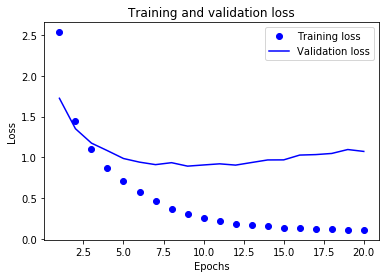

In [13]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
model = models.Sequential() 
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',              
              loss='categorical_crossentropy',              
              metrics=['accuracy'])

model.fit(partial_x_train,                    
          partial_y_train,                   
          epochs=9,                    
          batch_size=512,                    
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)


Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 287us/step - loss: 2.5354 - acc: 0.5228 - val_loss: 1.6780 - val_acc: 0.6520
Epoch 2/9
7982/7982 [==============================] - 1s 184us/step - loss: 1.3743 - acc: 0.7115 - val_loss: 1.2825 - val_acc: 0.7230
Epoch 3/9
7982/7982 [==============================] - 2s 235us/step - loss: 1.0185 - acc: 0.7786 - val_loss: 1.1348 - val_acc: 0.7500
Epoch 4/9
7982/7982 [==============================] - 2s 203us/step - loss: 0.8014 - acc: 0.8245 - val_loss: 1.0539 - val_acc: 0.7560
Epoch 5/9
7982/7982 [==============================] - 2s 206us/step - loss: 0.6420 - acc: 0.8617 - val_loss: 0.9739 - val_acc: 0.7950
Epoch 6/9
7982/7982 [==============================] - 2s 198us/step - loss: 0.5139 - acc: 0.8924 - val_loss: 0.9099 - val_acc: 0.8120
Epoch 7/9
7982/7982 [==============================] - 1s 174us/step - loss: 0.4138 - acc: 0.9141 - val_loss: 0.8958 - val_acc: 0.8210
Epoch 8

In [16]:
results

[1.023639574288685, 0.7769367765446168]

In [17]:
predictions = model.predict(x_test)


In [18]:
np.argmax(predictions[0]) 

3